In [18]:
import pandas as pd

order_data = pd.read_csv('chipotle.csv')

In [19]:
order_data.head()

,Food,Order,Meat,Weight,Store
0,0,0,0.0,993.23,0
1,0,0,0.0,909.18,0
2,2,0,NaN,93.05,0
3,1,1,0.0,912.18,0
4,2,1,NaN,90.05,0


In [20]:
order_data.describe()

,Food,Order,Meat,Weight,Store
count,45.000000,45.000000,30.000000,45.000000,45.000000
mean,1.000000,0.488889,0.333333,580.655556,1.000000
std,0.825723,0.505525,0.479463,350.876559,0.825723
min,0.000000,0.000000,0.000000,86.050000,0.000000
25%,0.000000,0.000000,0.000000,122.400000,0.000000
50%,1.000000,0.000000,0.000000,717.740000,1.000000
75%,2.000000,1.000000,1.000000,855.490000,2.000000
max,2.000000,1.000000,1.000000,1054.930000,2.000000


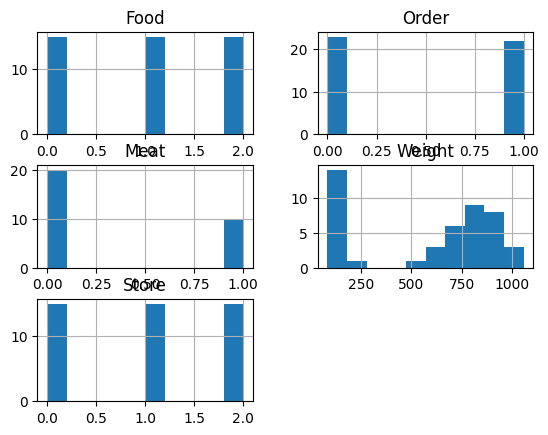

In [21]:
import matplotlib.pyplot as plt

order_data.hist()
plt.show()

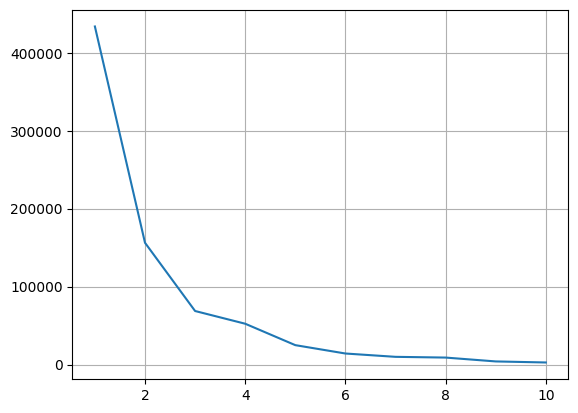

In [22]:
from sklearn.cluster import KMeans

def get_inertias(df: pd.DataFrame, k_values: list[int]) -> list:
    inertias = []
    for k in k_values:
        kmean = KMeans(n_clusters=k, random_state=309).fit(df)
        inertias.append(kmean.inertia_)
    
    return inertias


bb_data = order_data.dropna()

k_range = range(1,11)
inertias = get_inertias(bb_data, k_range)
plt.plot(k_range, inertias)
plt.
plt.grid()
plt.show()


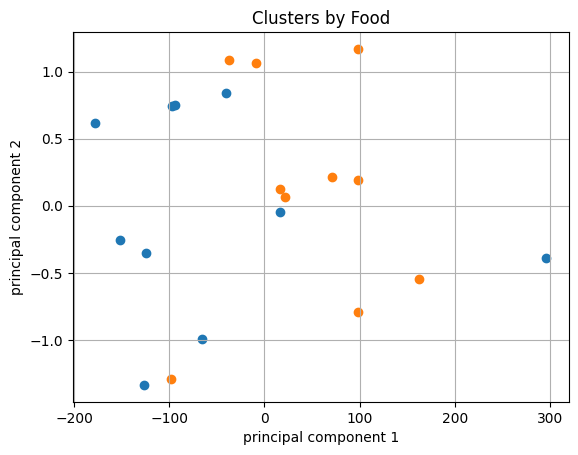

In [26]:
from sklearn.decomposition import PCA
from numpy.typing import ArrayLike

def pca_transformation(data):
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(data)
    principal_df = pd.DataFrame(data = principal_components
             ,columns = ['principal component 1', 'principal component 2'])
    return principal_df


def plot_2d_clusters(df: pd.DataFrame, x: str, y: str, k: int, cluster_array: ArrayLike, title: str = None) -> None:
    for cluster in range(k):
        plt.scatter(df.loc[cluster_array == cluster, x],
                    df.loc[cluster_array == cluster, y])
    plt.xlabel(x)
    plt.ylabel(y)
    if title:
        plt.title(f'Clusters by {title}')
    plt.grid()
    plt.show()

cluster_by = 'Food'
bb_pca = pca_transformation(bb_data)
x = bb_pca.keys()[0]
y = bb_pca.keys()[1]
plot_2d_clusters(bb_pca, x, y, 2, order_data[cluster_by], cluster_by)